In [ ]:
Yang Zhang
Ruoxuan Lin

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot
import seaborn as sns
from scipy.spatial import distance
import geopandas as gpd

# if there have problem on intall package:
# try this code in note book "!which python" find the path of note book
# then use "path -m pip install geopandas joypy" in notebook's termial

In [3]:
df = pd.read_csv('NMC_5_0.csv')

Problem 1: included in the Introduction section of report
academic resources. 

Problem 2: included in the Data section of the report

Problem 3

In [7]:
df_2012 = df[df['year'] == 2012]
df_2012_cleaned = df_2012[df_2012['cinc'] != '-9']

# Identify the top 10 most capable countries
df_2012_cleaned['cinc'] = df_2012_cleaned['cinc'].astype(float)
top_10_countries = df_2012_cleaned.nlargest(10, 'cinc')
print(top_10_countries)

      stateabb  ccode  year      milex  milper    irst      pec       tpop  \
13141      CHN    710  2012  102643000    2285  731040  5333707  1377065.0   
196        USA      2  2012  655388000    1569   88695  3159873   317505.0   
13658      IND    750  2012   33404000    1325   77264  1385461  1236687.0   
7863       RUS    365  2012   58765000     956   70209  1356742   143170.0   
13592      JPN    740  2012   59077000     248  107232   737482   127250.0   
2929       BRA    140  2012   35266000     318   34524   345842   198656.0   
13445      ROK    732  2012   29256000     655   69073   444461    49003.0   
5572       GMY    255  2012   40994000     251   42661   468740    82800.0   
11720      IRN    630  2012   25249000     523   14463   397332    76424.0   
3930       UKG    200  2012   61274000     174    9579   315502    62783.0   

           upop      cinc  version  
13141  440254.0  0.218117     2011  
196    183712.0  0.139353     2011  
13658  223768.0  0.080899     

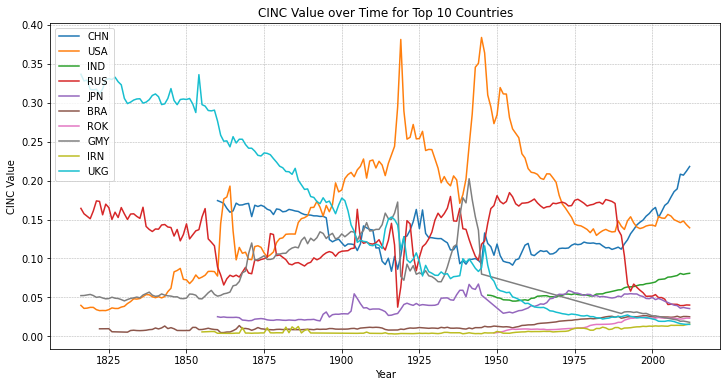

In [8]:
plt.figure(figsize=(12, 6))
for country in top_10_countries['stateabb']:
    # Filter data for each country
    country_data = df[df['stateabb'] == country]
    # Plot the 'cinc' variable over time for the selected country
    plt.plot(country_data['year'], country_data['cinc'], label=country)
    plt.title('CINC Value over Time for Top 10 Countries')
    plt.xlabel('Year')
    plt.ylabel('CINC Value')
    plt.legend(loc='upper left')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Evaluation be included in the Analysis section of the report

Problem 4

In [11]:
from joypy import joyplot

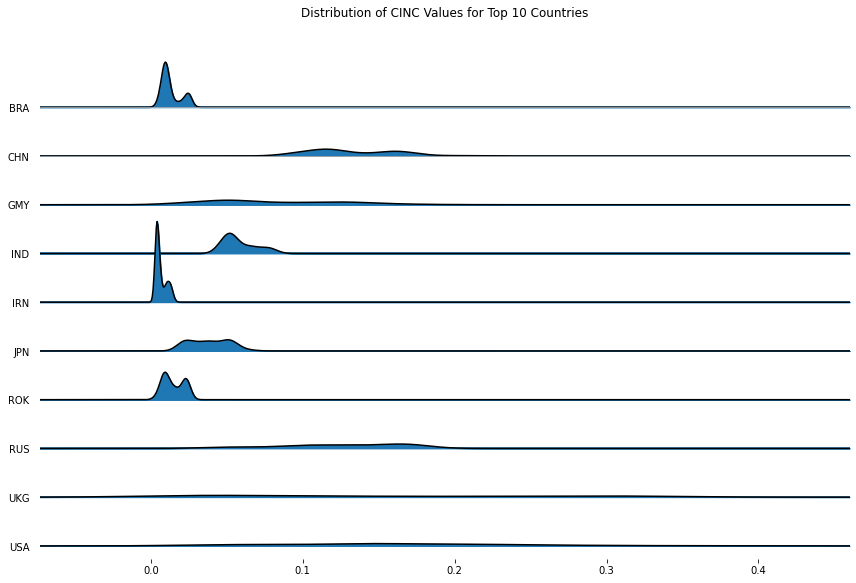

In [12]:
top_10_countries_list = top_10_countries['stateabb'].tolist()
top10_full_info = df[df['stateabb'].isin(top_10_countries_list)]

# Create the ridgeline plot
fig, axes = joyplot(
    data=top10_full_info[['stateabb', 'cinc']], 
    by='stateabb',
    grid='y',   # Show horizontal grid lines
    figsize=(12, 8)
)

plt.title('Distribution of CINC Values for Top 10 Countries')
plt.show()


In [13]:
print(df_2012_cleaned)

      stateabb  ccode  year      milex  milper   irst      pec      tpop  \
196        USA      2  2012  655388000    1569  88695  3159873  317505.0   
289        CAN     20  2012   18445000      66  13507   343023   34838.0   
329        BHM     31  2012      55000       1      0      261     372.0   
438        CUB     40  2012         -9      49    277    16460   11271.0   
574        HAI     41  2012         -9       0      0     4883   10174.0   
...        ...    ...   ...        ...     ...    ...      ...       ...   
15070      NAU    970  2012          0       0      0        3      10.0   
15092      MSI    983  2012          0       0      0       14      53.0   
15111      PAL    986  2012          0       0      0       12      21.0   
15133      FSM    987  2012          0       0      0        9     504.0   
15170      WSM    990  2012          0       0      0       38     189.0   

           upop          cinc  version  
196    183712.0  1.393526e-01     2011  
289  

Question 5

           milex    milper      irst       pec      tpop      upop      cinc
milex   1.000000  0.555008  0.282977  0.632414  0.301069  0.487709  0.646509
milper  0.555008  1.000000  0.726129  0.851630  0.800926  0.859919  0.892828
irst    0.282977  0.726129  1.000000  0.901660  0.787834  0.889671  0.881858
pec     0.632414  0.851630  0.901660  1.000000  0.816074  0.940502  0.988420
tpop    0.301069  0.800926  0.787834  0.816074  1.000000  0.936735  0.858843
upop    0.487709  0.859919  0.889671  0.940502  0.936735  1.000000  0.966284
cinc    0.646509  0.892828  0.881858  0.988420  0.858843  0.966284  1.000000


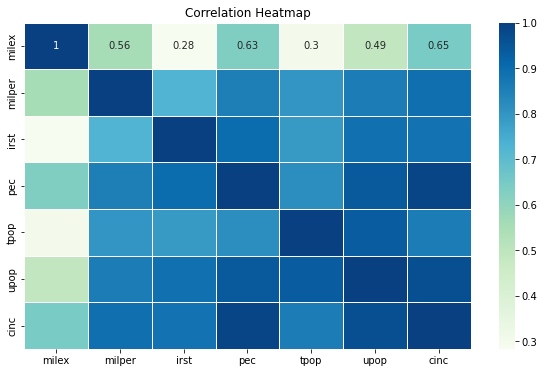

In [15]:
plt.figure(figsize=(10,6))
#seperate variables
columns = df_2012_cleaned[['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']]
#corr
correlation_matrix = columns.corr()
#matrix
print(correlation_matrix)
#heat map
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', linewidths=0.5 )
plt.title("Correlation Heatmap")
plt.show()


Question 6

In [17]:
# Standardize the data between 0 and 1
normal_2012_df = (columns - columns.min(axis=0)) / (columns.max(axis=0) - columns.min(axis=0))

# Initialize lists
m_distances = []
e_distances = []

# Calculate distances
countries = df_2012_cleaned['stateabb'].unique()

for i in range(len(countries)):
    for j in range(i+1, len(countries)): 
        # manhattan distance
        m_dist = distance.cityblock(normal_2012_df.iloc[i], normal_2012_df.iloc[j])
        # Euclidean distance
        e_dist = distance.euclidean(normal_2012_df.iloc[i], normal_2012_df.iloc[j])
        #record
        m_distances.append((countries[i], countries[j], m_dist))
        e_distances.append((countries[i], countries[j], e_dist))

# Convert the lists to dataframes and sort
m_dist_df = pd.DataFrame(m_distances, columns=['Country1', 'Country2', 'Distance']).sort_values(by='Distance')
e_dist_df = pd.DataFrame(e_distances, columns=['Country1', 'Country2', 'Distance']).sort_values(by='Distance')

# Get top 10 smallest distances
manhattan_10 = m_dist_df.head(10)
euclidean_10 = e_dist_df.head(10)

print("Top 10 Manhattan Distances:\n", manhattan_10)
print("\nTop 10 Euclidean Distances:\n", euclidean_10)


Top 10 Manhattan Distances:
       Country1 Country2      Distance
18889      TUV      NAU  4.483284e-07
2801       SKN      MSI  3.292857e-06
18881      KIR      TON  3.971527e-06
7134       MNC      LIE  4.230290e-06
1896       GRN      SVG  5.387922e-06
2073       GRN      TON  5.837439e-06
2438       SVG      TON  6.259017e-06
7146       MNC      SNM  6.854189e-06
7298       LIE      SNM  7.007292e-06
2261       SLU      WSM  8.471962e-06

Top 10 Euclidean Distances:
       Country1 Country2      Distance
18889      TUV      NAU  3.820809e-07
2801       SKN      MSI  2.243876e-06
18881      KIR      TON  3.001378e-06
7134       MNC      LIE  3.127362e-06
1896       GRN      SVG  3.792127e-06
2438       SVG      TON  3.901142e-06
7298       LIE      SNM  4.770612e-06
2073       GRN      TON  4.968821e-06
7146       MNC      SNM  5.269978e-06
2261       SLU      WSM  6.243582e-06


Question 7

/tmp/ipykernel_230/2575778251.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


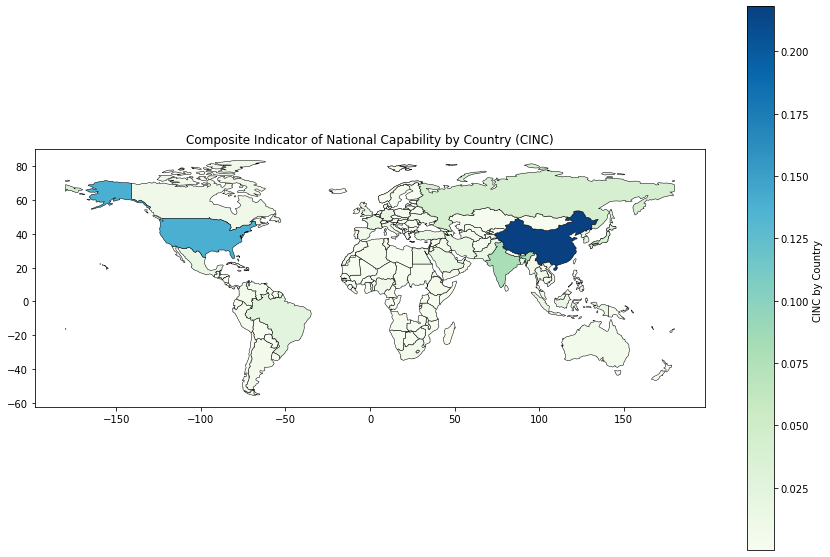

In [19]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# we need to mapping state name with their abbreviation
# load COW-country-codes file wich recorded all abbreviations
mapping_df = pd.read_csv('COW-country-codes.csv')

# Merge two df to add state full names
# left joint, left_on rigt_on match two colume which is going to map
df_full_name = pd.merge(df_2012_cleaned, mapping_df, left_on='stateabb', 
                        right_on='StateAbb', how='left')

# merge with the world-geo df by full names
merged = world.set_index('name').join(df_full_name.set_index('StateNme'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='cinc', ax=ax, legend=True, cmap='GnBu', 
            legend_kwds={'label': "CINC by Country "},
            edgecolor = "black", linewidth=0.5)
plt.title('Composite Indicator of National Capability by Country (CINC)')
plt.show()
